In [41]:
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv("C:/Users/bharani/Downloads/datasets_9768_13874_HR_comma_sep.csv")
col_names = data.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
data.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
#data preprocessing
data=data.rename(columns={'sales':'departments'})
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [44]:
data['departments']=np.where(data['departments']=='support','technical',data['departments'])

In [45]:
data['departments']=np.where(data['departments']=='IT','technical',data['departments'])

In [46]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
data.shape

(14999, 10)

In [48]:
#replacing the data with dummies ie.0 or 1
cat_vars = ['departments', 'salary']

for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data = pd.concat([data, cat_list], axis=1)

print("Updated DataFrame:")
print(data)


Updated DataFrame:
       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                   

In [49]:
data.drop(data.columns[[8,9]],inplace=True,axis=1)
data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'departments_RandD',
       'departments_accounting', 'departments_hr',
       'departments_management', 'departments_marketing',
       'departments_product_mng', 'departments_sales',
       'departments_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [50]:
data_vars=data.columns.values.tolist()
y=['left']
x=[i for i in data_vars if i not in y]

In [51]:
#feature selection using RecursiveFeatureElimination
#RFE involves dimensionality reduction by selecting the important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
rfe=RFE(model,n_features_to_select=10)
rfe=rfe.fit(data[x],data[y]) 
print(rfe.support_) #returns either True or False which indicates the corresponding feature is selected or not
print(rfe.ranking_) #ranks the selected features accordingly

C:\Users\bharani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bharani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bharani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bharani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
#splitting the dataset and performing LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(data[x],data[y], test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)

In [54]:
model.fit(X_train, y_train)
#calculating the accuracy of the model
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(X_test))))


C:\Users\bharani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression accuracy: 0.784


In [55]:
#Using Randomforest classifier 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\bharani\AppData\Local\Temp\ipykernel_26144\4229390445.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [56]:
#model evaluation of RandomForest
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))


Random Forest Accuracy: 0.987


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



Text(0.5, 1.0, 'Random Forest')

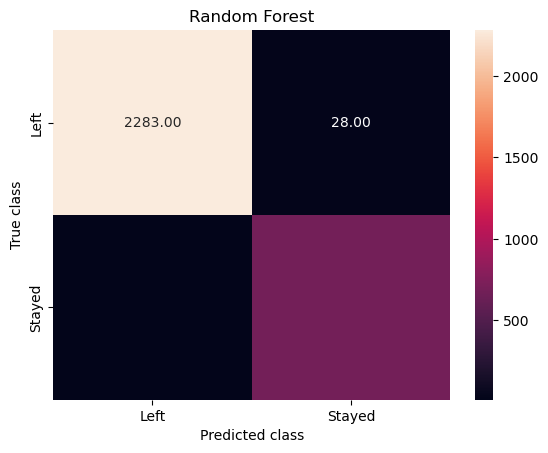

In [58]:
y_pred = rf.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

In [59]:
#model evaluation of logisticRegression
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



Text(0.5, 1.0, 'Logistic Regression')

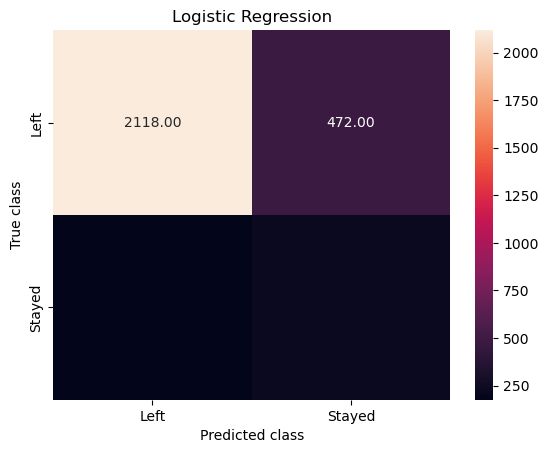

In [61]:
logreg_y_pred = model.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

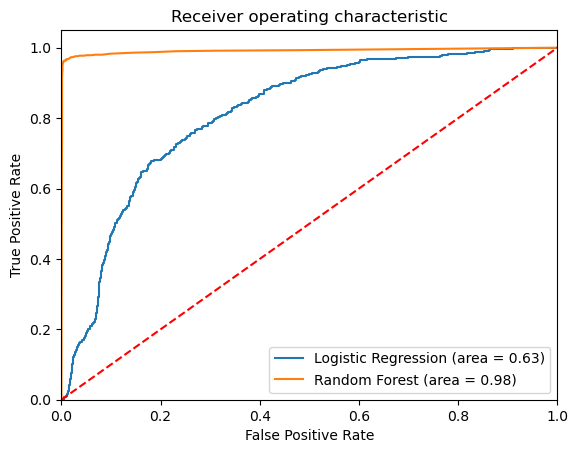

In [64]:
#prediction curve using ROC
#random forest acts as a better classifier than logistic regression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
#gives the feature labels that influeneces the employeeTurnover in an ascending order
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    if index < len(feature_labels):  # Ensure index is within range
        print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] * 100.0)))
else:
        print('Index {} out of bounds for feature_labels.'.format(index))

salary_low-0.13%
salary_high-0.14%
department_management-0.16%
department_hr-0.17%
department_RandD-0.89%
last_evaluation-12.67%
Work_accident-14.39%
promotion_last_5years-18.14%
time_spend_company-18.18%
satisfaction_level-32.60%
Index 0 out of bounds for feature_labels.
